# GitHub Connections

Our Project's GitHub Link
https://github.com/Darth-Rithvik-Vader-dot-php/EC523_Graph_Transformer/tree/90bf504a28b98da42b6a4f984b6ab506379d2db8/tmi2022

In [1]:
# doesn't work - suspect it is because our repository is currently private
#!git clone "https://github.com/Darth-Rithvik-Vader-dot-php/EC523_Graph_Transformer/tree/90bf504a28b98da42b6a4f984b6ab506379d2db8/tmi2022"#"project github url"

In [2]:
# not using this anymore
#!git clone "https://github.com/vkola-lab/tmi2022.git"

#Install Packages

In [3]:
# TBD
!pip install tensorboardx
!pip install einops
!pip install torch_geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00


In [4]:
# openslide
!apt update && apt install -y openslide-tools
!pip install openslide-python

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [830 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,371 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubun

#Connect to the project directory in google drive.

Make sure to directly save into or add a shortcut in your personal "My Drive" root to the shared folder "tmi2022-main". This will enable you to access the project folders when running this shared colab.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set the project drive directory location

In [6]:
import os

# Set the new directory
new_directory = "/content/drive/My Drive/tmi2022-main"
os.chdir(new_directory)

# Check that the directory has changed
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /content/drive/.shortcut-targets-by-id/1OkrDFBS2nWCjDRwyvTaVNYYAA6YM8E2T/tmi2022-main


# 1. Tiling Patches and Graph Creation

Tiling Patches

In [7]:
"""
!python src/tile_WSI.py -s 512 -e 0 -j 32 -B 50 -M 20 -o <full_path_to_output_folder> "full_path_to_input_slides/*/*.svs"
"""

/bin/bash: line 1: full_patch_to_output_folder: No such file or directory


Training Patch Extractor

In [8]:
# change directory to feature_extractor
new_directory = "/content/drive/My Drive/tmi2022-main/feature_extractor"
os.chdir(new_directory)

print("Current Directory:", os.getcwd())

Current Directory: /content/drive/.shortcut-targets-by-id/1OkrDFBS2nWCjDRwyvTaVNYYAA6YM8E2T/tmi2022-main/feature_extractor


In [9]:

!python run.py


2024-05-03 05:47:59.912346: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 05:47:59.912406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 05:47:59.914447: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 05:48:02.469870: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Please install apex for mixed precision training from: https://github.com/NVIDIA/apex
Running on: cuda
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 10 worker processes i

Constucting Graph
path_to_patches is currently at https://drive.google.com/drive/folders/1_ZloIFXUImRpo85Xjh7Y-2hlLR6r9gSw?usp=drive_link

In [10]:
# ok to skip this. graphs are already created and uploaded # 3.

#!python build_graphs.py --weights "path_to_pretrained_feature_extractor" --dataset "path_to_patches" --output "../graphs"
!python feature_extractor/build_graphs.py --weights "/content/drive/My Drive/tmi2022-main/feature_extractor/model.pth" --dataset "/content/drive/My Drive/tmi2022-main/feature_extractor/training_patches/**/*" --output "/content/drive/My Drive/tmi2022-main/graphs"


python3: can't open file '/content/drive/.shortcut-targets-by-id/1OkrDFBS2nWCjDRwyvTaVNYYAA6YM8E2T/tmi2022-main/feature_extractor/feature_extractor/build_graphs.py': [Errno 2] No such file or directory


#2. Training Graph-Transformer


In [11]:
# change directory to ../tmi2022-main
new_directory = "/content/drive/My Drive/tmi2022-main"
os.chdir(new_directory)

print("Current Directory:", os.getcwd())

Current Directory: /content/drive/.shortcut-targets-by-id/1OkrDFBS2nWCjDRwyvTaVNYYAA6YM8E2T/tmi2022-main


In [12]:
##%tensorboard --logdir logs

In [13]:
!bash scripts/train.sh

Streaming output truncated to the last 5000 lines.
 [2. 1. 7.]]
[30/30] val agg acc: 0.567
[[ 2.  1.  3.]
 [ 2.  4.  2.]
 [ 2.  3. 11.]]
epoch [204/300] ------ acc: train = 0.6449, val = 0.5667


=>Epoches 205, learning rate = 0.0000100, previous best = 0.6667
[18/138] train loss: 0.323; agg acc: 0.722
[[4. 0. 1.]
 [1. 3. 1.]
 [0. 2. 6.]]
[36/138] train loss: 0.363; agg acc: 0.667
[[ 6.  1.  3.]
 [ 1.  4.  1.]
 [ 1.  5. 14.]]
[54/138] train loss: 0.336; agg acc: 0.722
[[ 8.  3.  4.]
 [ 1.  7.  1.]
 [ 1.  5. 24.]]
/content/drive/MyDrive/tmi2022-main/graphs/simclr_files/00a26aaa82c959624d90dfb69fcf259c/features.pt not exists
/content/drive/MyDrive/tmi2022-main/graphs/simclr_files/00a26aaa82c959624d90dfb69fcf259c/adj_s.pt not exists
[72/138] train loss: 0.329; agg acc: 0.750
[[11.  4.  5.]
 [ 1. 11.  1.]
 [ 2.  5. 32.]]
[90/138] train loss: 0.346; agg acc: 0.722
[[13.  4.  5.]
 [ 4. 13.  1.]
 [ 4.  7. 39.]]
[108/138] train loss: 0.342; agg acc: 0.722
[[17.  4.  9.]
 [ 4. 15.  2.]
 [ 4.  7

In [14]:
!bash scripts/test.sh

GraphCAM
train: False test: True graphcam: False
preparing datasets and dataloaders......
batch size 1
root /content/drive/MyDrive/tmi2022-main/graphs/simclr_files/
creating models......
load model/content/drive/MyDrive/tmi2022-main/graph_transformer/saved_models/GraphCAM.pth

=>Epoches 1, learning rate = 0.0010000, previous best = 0.0000
epoch 0
evaluating...
len dataloader val 31
[6/31] val agg acc: 0.500
[[0. 0. 0.]
 [0. 0. 2.]
 [1. 0. 3.]]
[12/31] val agg acc: 0.500
[[0. 1. 1.]
 [0. 0. 2.]
 [1. 1. 6.]]
[18/31] val agg acc: 0.444
[[1. 2. 1.]
 [1. 0. 2.]
 [1. 3. 7.]]
[24/31] val agg acc: 0.417
[[2. 2. 2.]
 [1. 0. 3.]
 [2. 4. 8.]]
[30/31] val agg acc: 0.467
[[ 4.  2.  2.]
 [ 2.  0.  3.]
 [ 2.  5. 10.]]
[31/31] val agg acc: 0.452
[[ 4.  2.  2.]
 [ 2.  0.  3.]
 [ 2.  6. 10.]]
epoch [1/1] ------ acc: train = 0.0000, val = 0.4516



#3. GraphCAM

In [15]:
"""
import torch

model = torch.load('/content/drive/MyDrive/tmi2022-main/graph_transformer/saved_models/GraphCAM.pth')
print(model)
"""

"\nimport torch\n\nmodel = torch.load('/content/drive/MyDrive/tmi2022-main/graph_transformer/saved_models/GraphCAM.pth')\nprint(model)\n"

(a) To generate GraphCAM of the model on the WSI:

In [16]:
!bash scripts/get_graphcam.sh

GraphCAM
train: False test: True graphcam: True
preparing datasets and dataloaders......
batch size 1
root /content/drive/MyDrive/tmi2022-main/graphs/simclr_files/
creating models......
load model/content/drive/MyDrive/tmi2022-main/graph_transformer/saved_models/GraphCAM.pth

=>Epoches 1, learning rate = 0.0010000, previous best = 0.0000
epoch 0
evaluating...
len dataloader val 30
/content/drive/MyDrive/tmi2022-main/graphs/simclr_files/00a76bfbec239fd9f465d6581806ff42/adj_s.pt not exists
GraphCAM enabled
/content/drive/.shortcut-targets-by-id/1OkrDFBS2nWCjDRwyvTaVNYYAA6YM8E2T/tmi2022-main/models/GraphTransformer.py:81: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  p = F.softmax(out)
/content/drive/MyDrive/tmi2022-main/graphs/simclr_files/00a7fb880dc12c5de82df39b30533da9/adj_s.pt not exists
GraphCAM enabled
GraphCAM enabled
GraphCAM enabled
GraphCAM enabled
GraphCAM enabled
[6/30] val agg acc: 0.667
[[0. 0. 1.]

(b) To visualize the GraphCAM:

In [17]:
!bash scripts/vis_graphcam.sh

00a76bfbec239fd9f465d6581806ff42
normal

p [0.24791652 0.3040738  0.44800964]
both /content/drive/MyDrive/tmi2022-main/training_patches/training_patches/00a76bfbec239fd9f465d6581806ff42_files/1.0/00a76bfbec239fd9f465d6581806ff42
25.6 25.6
visulize GraphCAM


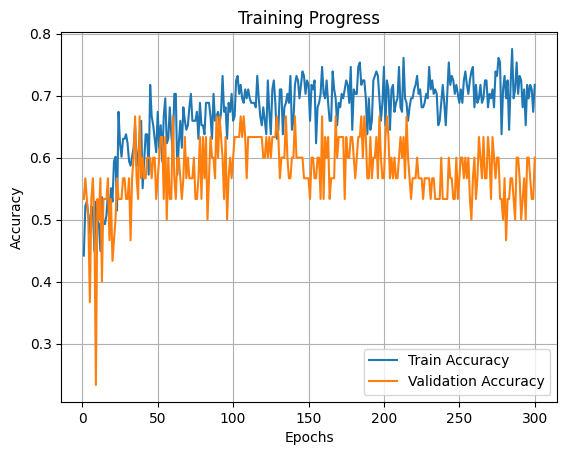

In [18]:
import re
import matplotlib.pyplot as plt

def plot_training_progress(log_file_path):
    with open(log_file_path, 'r') as file:
        lines = file.readlines()

    epochs = []
    train_acc = []
    val_acc = []

    for line in lines:
        if line.startswith('epoch'):
            epoch_match = re.search(r'\[(\d+)', line)  # Match the digits within square brackets
            if epoch_match:
                epoch_number = int(epoch_match.group(1))
                epochs.append(epoch_number)
                acc_info = line.split('------')[1].strip().split(',')
                train_acc.append(float(acc_info[0].split('=')[1].strip()))
                val_acc.append(float(acc_info[1].split('=')[1].strip()))

    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Progress')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
log_file_path = '/content/drive/MyDrive/tmi2022-main/graph_transformer/runs/GraphCAM.log'
plot_training_progress(log_file_path)
